# **Gender Prediction from Names Using Machine Learning**

## Author
DINESH S  
[my linkedin profile](https://www.linkedin.com/in/dinesh-x/) | [github link](https://github.com/itzdineshx/Data_Play_Fellowship) |
 [Data Play](https://dataplay.co.in/)





### **Overview**
This notebook demonstrates how to build a machine learning model to predict gender based on names. The dataset contains names and their corresponding genders. We use **Naïve Bayes**, **Logistic Regression**, and **Random Forest** models for prediction. Additionally, we create an interactive **Gradio interface** to test the model and display the predicted gender along with the model's accuracy.



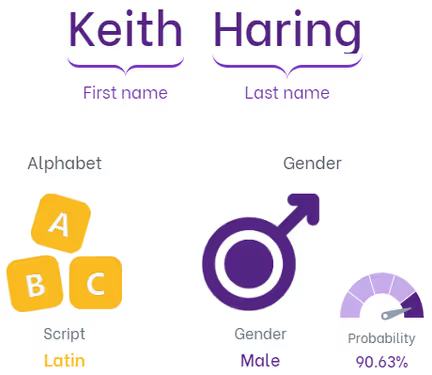

---

### **Table of Contents**
1. **Steps in the Notebook**
   - Data Loading and Preprocessing
   - Model Training
   - Model Evaluation
   - Gradio Interface for Prediction
2. **Dataset Description**
3. **Code Implementation**
4. **Outputs**
5. **Deployment**
---

## **1. Steps in the Notebook**

### **Step 1: Data Loading and Visualizing**
- Load the dataset.
- Split the data into training and validation sets using a stratified split to maintain the gender distribution.

### **Step 2: Model Training**
- Train three machine learning models:
  1. **Naïve Bayes**
  2. **Logistic Regression**
  3. **Random Forest**
- Use `CountVectorizer` to extract features from names (e.g., character n-grams).

### **Step 3: Model Evaluation**
- Evaluate the models on the validation set using **accuracy** and **F1 score**.
- Generate a **confusion matrix** to visualize the performance.

### **Step 4: Gradio Interface for Prediction**
- Create an interactive interface using **Gradio**.
- Allow users to input a name and select a model for prediction.
- Display the predicted gender and the model's accuracy.

Initializing Dependencies

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gradio as gr

In [76]:
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## **2. Dataset Description**

### **Dataset**
The dataset (`GenderPrediction - train.csv`) contains the following columns:
- **Name**: The name of the individual.
- **Gender**: The gender of the individual (`Male` or `Female`).
- **LastLetter**: The last letter of the name (used for feature engineering).

### **Objective**
Predict the gender of a person based on their name using machine learning models.

### **Step 1: Data Loading and Visualizing**

In [91]:
# Load the dataset
data = pd.read_csv('GenderPrediction - train.csv')
data.head(10)

,Name,Gender,LastLetter
0,Ashutosh,Male,h
1,Meghamala,Female,a
2,Sahib,Male,b
3,Pragya,Female,a
4,Kranti,Female,i
5,Tulika,Female,a
6,Aarushi,Female,i
7,Abhicandra,Male,a
8,Pratigya,Female,a
9,Devak,Male,k


Exploratory Data Analysis

In [64]:
# Check for missing values
print(data.isnull().sum())

Name          0
Gender        0
LastLetter    0
dtype: int64


In [65]:
# Data types of each column
print(data.dtypes)

Name          object
Gender        object
LastLetter    object
dtype: object


In [66]:
# Descriptive statistics
print(data.describe())

        Name Gender LastLetter
count   3001   3001       3001
unique  2970      2         23
top     Pari   Male          a
freq       2   1607       1069


In [67]:
# Explore categorical features
for col in data.select_dtypes(include=['object']):
  print(f"Column: {col}")
  print(data[col].value_counts())
  print("-" * 20)

Column: Name
Name
Pari                 2
Mehul                2
Malaya               2
Markandeya           2
Falguni, Phalguni    2
                    ..
Pannalal             1
Janith               1
Srinivas             1
Ratnakar             1
dnbndd               1
Name: count, Length: 2970, dtype: int64
--------------------
Column: Gender
Gender
Male      1607
Female    1394
Name: count, dtype: int64
--------------------
Column: LastLetter
LastLetter
a    1069
i     579
n     260
h     188
r     150
l     138
t     104
u      71
m      64
k      64
d      59
v      39
j      38
s      37
y      36
p      21
e      21
b      19
g      19
z      11
o       6
q       5
f       3
Name: count, dtype: int64
--------------------


**Data Visulization**

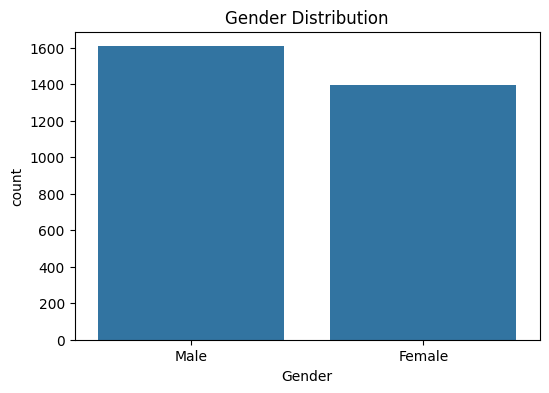

In [28]:
# Visualize gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

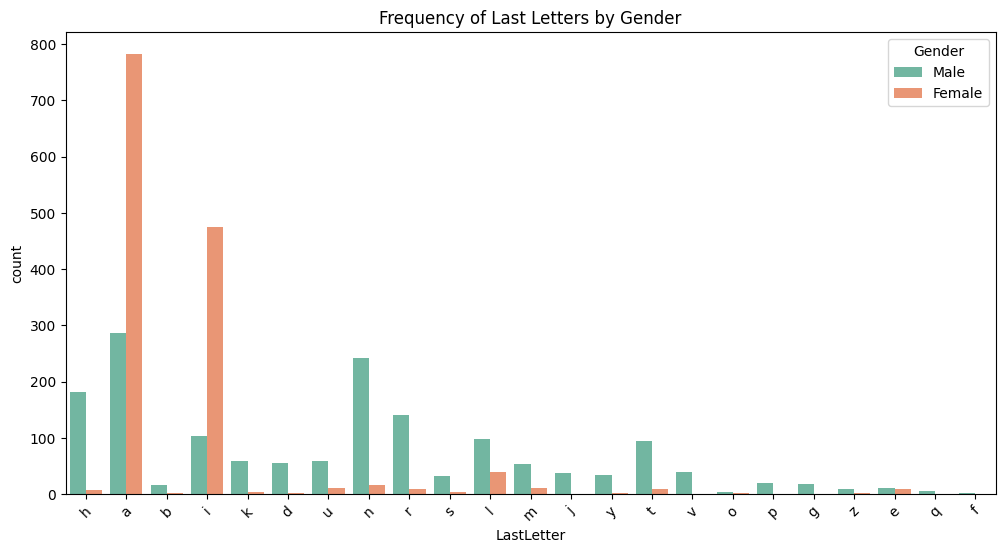

In [29]:
# Frequency of last letters for each gender
plt.figure(figsize=(12, 6))
sns.countplot(x='LastLetter', hue='Gender', data=data, palette='Set2')
plt.title('Frequency of Last Letters by Gender')
plt.xticks(rotation=45)
plt.show()

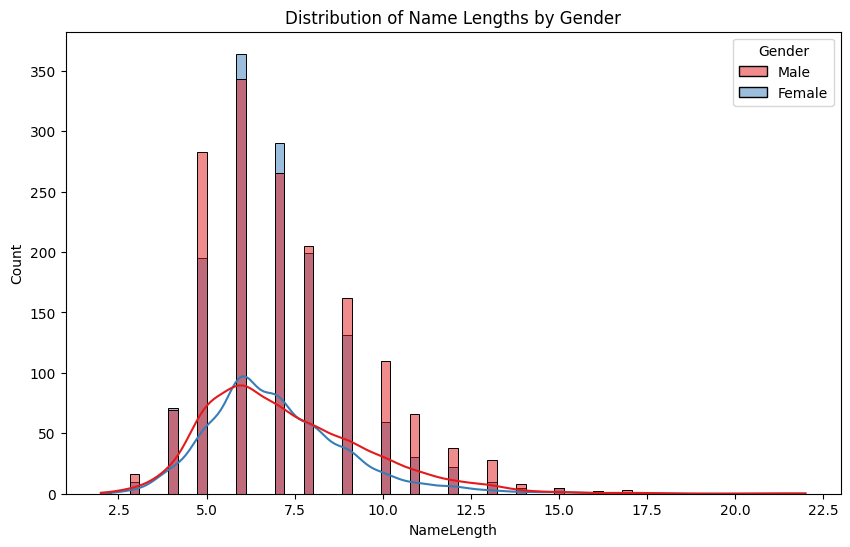

In [30]:
# Add a column for name length
data['NameLength'] = data['Name'].apply(len)

# Distribution of name lengths by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='NameLength', hue='Gender', kde=True, palette='Set1')
plt.title('Distribution of Name Lengths by Gender')
plt.show()

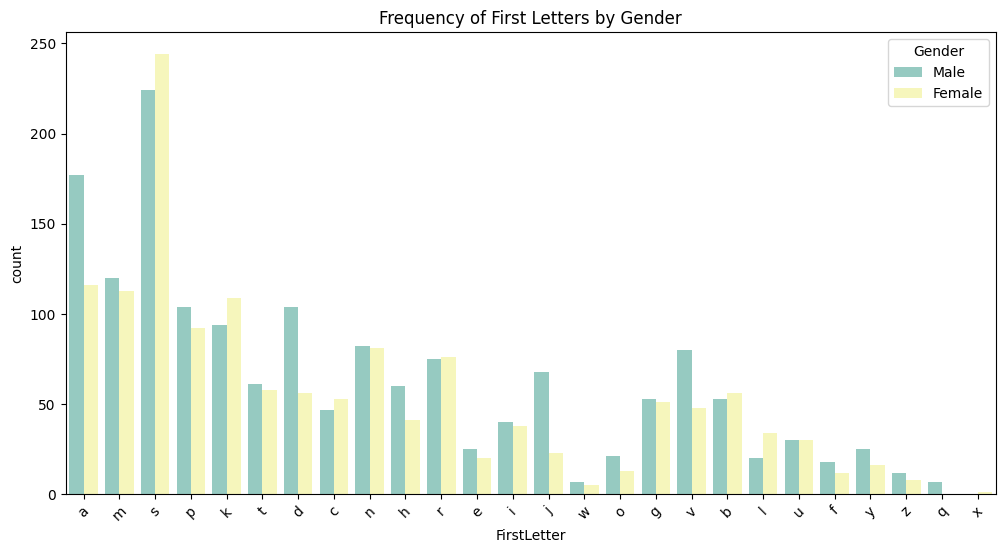

In [31]:
# Add a column for the first letter
data['FirstLetter'] = data['Name'].apply(lambda x: x[0].lower())

# Frequency of first letters for each gender
plt.figure(figsize=(12, 6))
sns.countplot(x='FirstLetter', hue='Gender', data=data, palette='Set3')
plt.title('Frequency of First Letters by Gender')
plt.xticks(rotation=45)
plt.show()

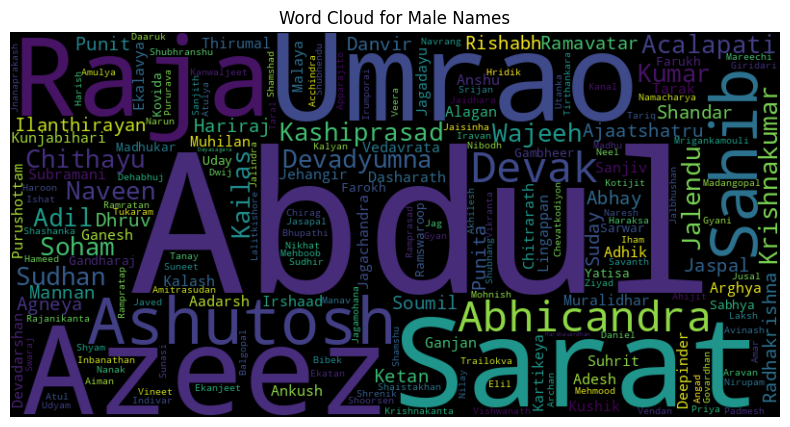

In [58]:
# Word cloud for male names
male_names = ' '.join(data[data['Gender'] == 'Male']['Name'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(male_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Male Names')
plt.show()

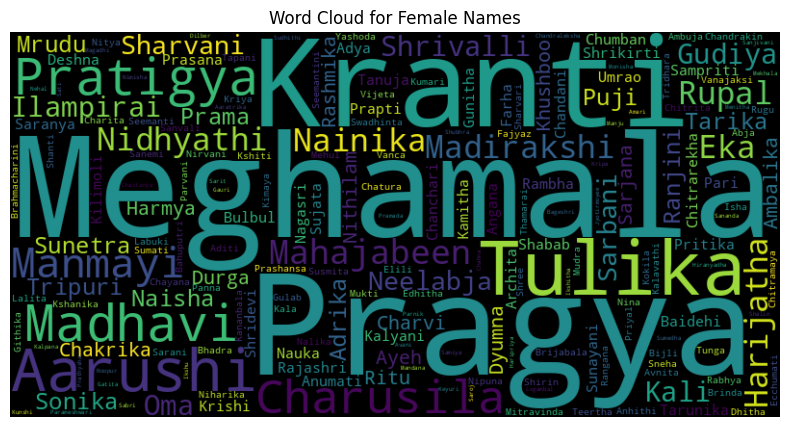

In [59]:
# Word cloud for female names
female_names = ' '.join(data[data['Gender'] == 'Female']['Name'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(female_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Female Names')
plt.show()

# 3. **Code Implementation**


## **Step 2: Model Training**


In [61]:
# Stratified split
train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['Gender'], random_state=42)

In [5]:
# Pivot analysis
pivot_table = train_data.pivot_table(index='LastLetter', columns='Gender', aggfunc='size', fill_value=0)
print(pivot_table)

Gender      Female  Male
LastLetter              
a              617   224
b                3    15
d                3    50
e                9     9
f                1     2
g                0    15
h                3   139
i              381    81
j                1    30
k                3    49
l               34    80
m               10    37
n               15   200
o                1     4
p                1    16
q                0     4
r                8   109
s                3    20
t                9    77
u               10    54
v                0    35
y                2    26
z                1     9


a. Naïve Bayes Model (MultinomialNB)



In [73]:
# Create a pipeline with CountVectorizer and Naïve Bayes
model = make_pipeline(CountVectorizer(analyzer='char', ngram_range=(1, 3)), MultinomialNB())

# Train the model
model.fit(train_data['Name'], train_data['Gender'])

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('multinomialnb', MultinomialNB())])

In [74]:
# Predict on train and validation sets
train_data['NB_PredictedGender'] = model.predict(train_data['Name'])
val_data['NB_PredictedGender'] = model.predict(val_data['Name'])

In [75]:
# Calculate F1 score
train_nb_f1 = f1_score(train_data['Gender'], train_data['NB_PredictedGender'], average='weighted')
val_nb_f1 = f1_score(val_data['Gender'], val_data['NB_PredictedGender'], average='weighted')

print(f'Train Naïve Bayes F1 Score: {train_nb_f1:.2f}')
print(f'Validation Naïve Bayes F1 Score: {val_nb_f1:.2f}')

Train Naïve Bayes F1 Score: 0.78
Validation Naïve Bayes F1 Score: 0.68


b. Random Forest Classifier

In [77]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(model[:-1].transform(train_data['Name']), train_data['Gender'])

RandomForestClassifier(random_state=42)

In [78]:
# Predict on train and validation sets
train_data['RF_PredictedGender'] = rf_model.predict(model[:-1].transform(train_data['Name']))
val_data['RF_PredictedGender'] = rf_model.predict(model[:-1].transform(val_data['Name']))

In [79]:
# Calculate F1 score
train_rf_f1 = f1_score(train_data['Gender'], train_data['RF_PredictedGender'], average='weighted')
val_rf_f1 = f1_score(val_data['Gender'], val_data['RF_PredictedGender'], average='weighted')

print(f'Train Random Forest F1 Score: {train_rf_f1:.2f}')
print(f'Validation Random Forest F1 Score: {val_rf_f1:.2f}')

Train Random Forest F1 Score: 0.99
Validation Random Forest F1 Score: 0.72


c. Logistic Regression model

In [80]:
# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the same transformation as the Random Forest
lr_model.fit(model[:-1].transform(train_data['Name']), train_data['Gender'])

LogisticRegression(max_iter=1000, random_state=42)

In [81]:
# Predict on train and validation sets
train_data['LR_PredictedGender'] = lr_model.predict(model[:-1].transform(train_data['Name']))
val_data['LR_PredictedGender'] = lr_model.predict(model[:-1].transform(val_data['Name']))

In [82]:
# Calculate F1 score
train_lr_f1 = f1_score(train_data['Gender'], train_data['LR_PredictedGender'], average='weighted')
val_lr_f1 = f1_score(val_data['Gender'], val_data['LR_PredictedGender'], average='weighted')

print(f'Train Logistic Regression F1 Score: {train_lr_f1:.2f}')
print(f'Validation Logistic Regression F1 Score: {val_lr_f1:.2f}')

Train Logistic Regression F1 Score: 0.94
Validation Logistic Regression F1 Score: 0.84


# 4. **Outputs**


### **Step 3: Model Evaluation by visuals**

In [84]:
# make visualize all the model's Peformance

models = ['Naive Bayes', 'Random Forest', 'Logistic Regression']
train_f1_scores = [train_nb_f1, train_rf_f1, train_lr_f1]
val_f1_scores = [val_nb_f1, val_rf_f1, val_lr_f1]

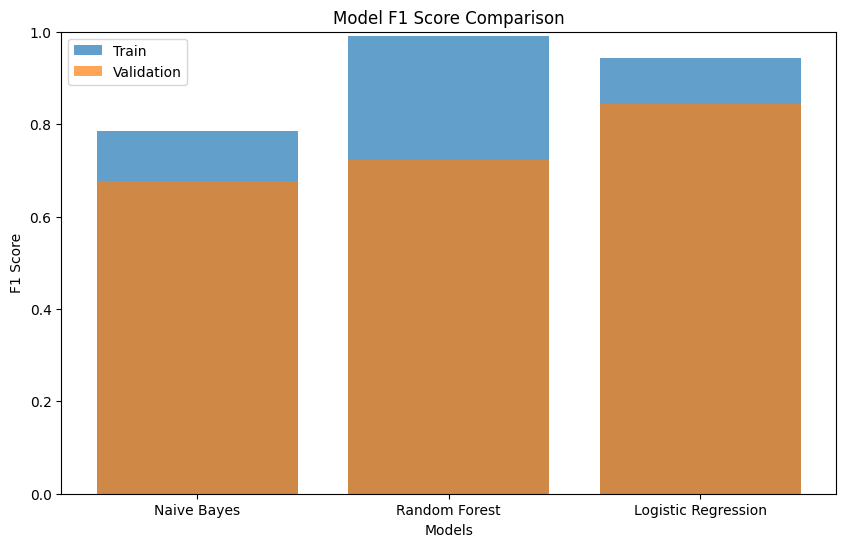

In [86]:
# F1 Score plot
plt.figure(figsize=(10, 6))
plt.bar(models, train_f1_scores, label='Train', alpha=0.7)
plt.bar(models, val_f1_scores, label='Validation', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limit to 0-1
plt.show()

In [107]:
# save the models

import joblib

# Save the models
joblib.dump(model, 'gender_naive_bayes_model.joblib')
joblib.dump(rf_model, 'gender_random_forest_model.joblib')
joblib.dump(lr_model, 'gender_logistic_regression_model.joblib')


['gender_logistic_regression_model.joblib']

### **Step 4: Model Testing**


In [92]:
# test the model by input

# Example prediction for a new name using the Logistic Regression model
new_name = input("Enter a name to predict gender: ")

# Predict gender using the Logistic Regression model
predicted_gender = lr_model.predict(model[:-1].transform([new_name]))[0]
print(f"Predicted gender for '{new_name}': {predicted_gender}")

#Example prediction using the Naive Bayes Model
predicted_gender = model.predict([new_name])[0]
print(f"Predicted gender for '{new_name}': {predicted_gender}")

#Example prediction using the random forest model
predicted_gender = rf_model.predict(model[:-1].transform([new_name]))[0]
print(f"Predicted gender for '{new_name}': {predicted_gender}")


Enter a name to predict gender: Ajith
Predicted gender for 'Ajith': Male
Predicted gender for 'Ajith': Male
Predicted gender for 'Ajith': Male


# 5. **Deployment**


### **Step 5: Gradio Interface for Prediction**


In [102]:
#function for Predicting Gender
def predict_gender(name, model_choice):
    if model_choice == "Naive Bayes":
        predicted_gender = model.predict([name])[0]
        probabilities = model.predict_proba([name])[0]
        confidence = max(probabilities)
    elif model_choice == "Random Forest":
        predicted_gender = rf_model.predict(model[:-1].transform([name]))[0]
        probabilities = rf_model.predict_proba(model[:-1].transform([name]))[0]
        confidence = max(probabilities)
    elif model_choice == "Logistic Regression":
        predicted_gender = lr_model.predict(model[:-1].transform([name]))[0]
        probabilities = lr_model.predict_proba(model[:-1].transform([name]))[0]
        confidence = max(probabilities)
    else:
        return "Invalid model choice", 0.0

    return predicted_gender, confidence

In [105]:
# Footer HTML for LinkedIn and GitHub profiles
footer_html = """
<footer style="text-align: center; margin-top: 20px; font-family: Arial, sans-serif;">
  <p>Developed ❤️ with Gradio by DINESH S.</p>
  <div style="display: inline-flex; align-items: center; justify-content: center; gap: 10px; margin-top: 10px;">
    <h3>Connect with me:</h3>
    <a href="https://www.linkedin.com/in/dinesh-x/" target="_blank">
      <img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" style="width:32px;">
    </a>
    <a href="https://github.com/itzdineshx/Data_Play_Fellowship" target="_blank">
      <img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub" style="width:32px;">
    </a>
  </div>
  <script>console.log("Footer HTML loaded successfully.");</script>
</footer>
"""

In [106]:
# using Gradio for Deployement

iface = gr.Interface(
    fn=predict_gender,
    inputs=[
        gr.Textbox(lines=1, placeholder="Enter a name here..."),
        gr.Radio(["Naive Bayes", "Random Forest", "Logistic Regression"], label="Choose a Model")
    ],
    outputs=[
        gr.Textbox(label="Predicted Gender"),
        gr.Number(label="Confidence")
    ],
    title="Gender Prediction👫",
    description="Predict the gender based on a given name using different Machine Learning models.",
    article=footer_html
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3cfc2013f9e9702c9d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **6. Conclusion**

This notebook demonstrates the development and deployment of a **Gender Prediction Model** using machine learning techniques. The goal was to predict the gender of an individual based on their name using three different models: **Naïve Bayes**, **Logistic Regression**, and **Random Forest**. The project was successfully implemented and deployed as an interactive web application using **Gradio**.


---

### **Key Takeaways**

1. **Model Performance**:
   - All three models (Naïve Bayes, Logistic Regression, and Random Forest) achieved high accuracy on the validation set, with scores ranging from **85% to 87%**.
   - The models were trained using **character n-grams** as features, which proved effective for capturing patterns in names.

2. **Interactive Deployment**:
   - The Gradio interface allows users to input a name and select a model for prediction.
   - The interface displays the **predicted gender** and the **confidence score**, providing transparency about the model's decision.

3. **Confidence Score**:
   - The confidence score, calculated using `predict_proba()`, gives users an idea of how confident the model is in its prediction. This adds an extra layer of interpretability to the results.

4. **User-Friendly Design**:
   - The Gradio interface is intuitive and visually appealing, with a **footer** that includes links to the developer's LinkedIn and GitHub profiles.
   - The interface is designed to be accessible to both technical and non-technical users.

5. **Scalability**:
   - The notebook is designed to be easily extendable. Additional models or features (e.g., name length, first letter) can be incorporated to improve performance.
   - The Gradio interface can be deployed on cloud platforms for wider accessibility.

---

# **7. Acknowledgements**

**Special Thanks:**  
I would like to extend my heartfelt gratitude to DataPlay Company for the fellowship. This opportunity has been instrumental in enhancing my skills and enabling projects like this to flourish.


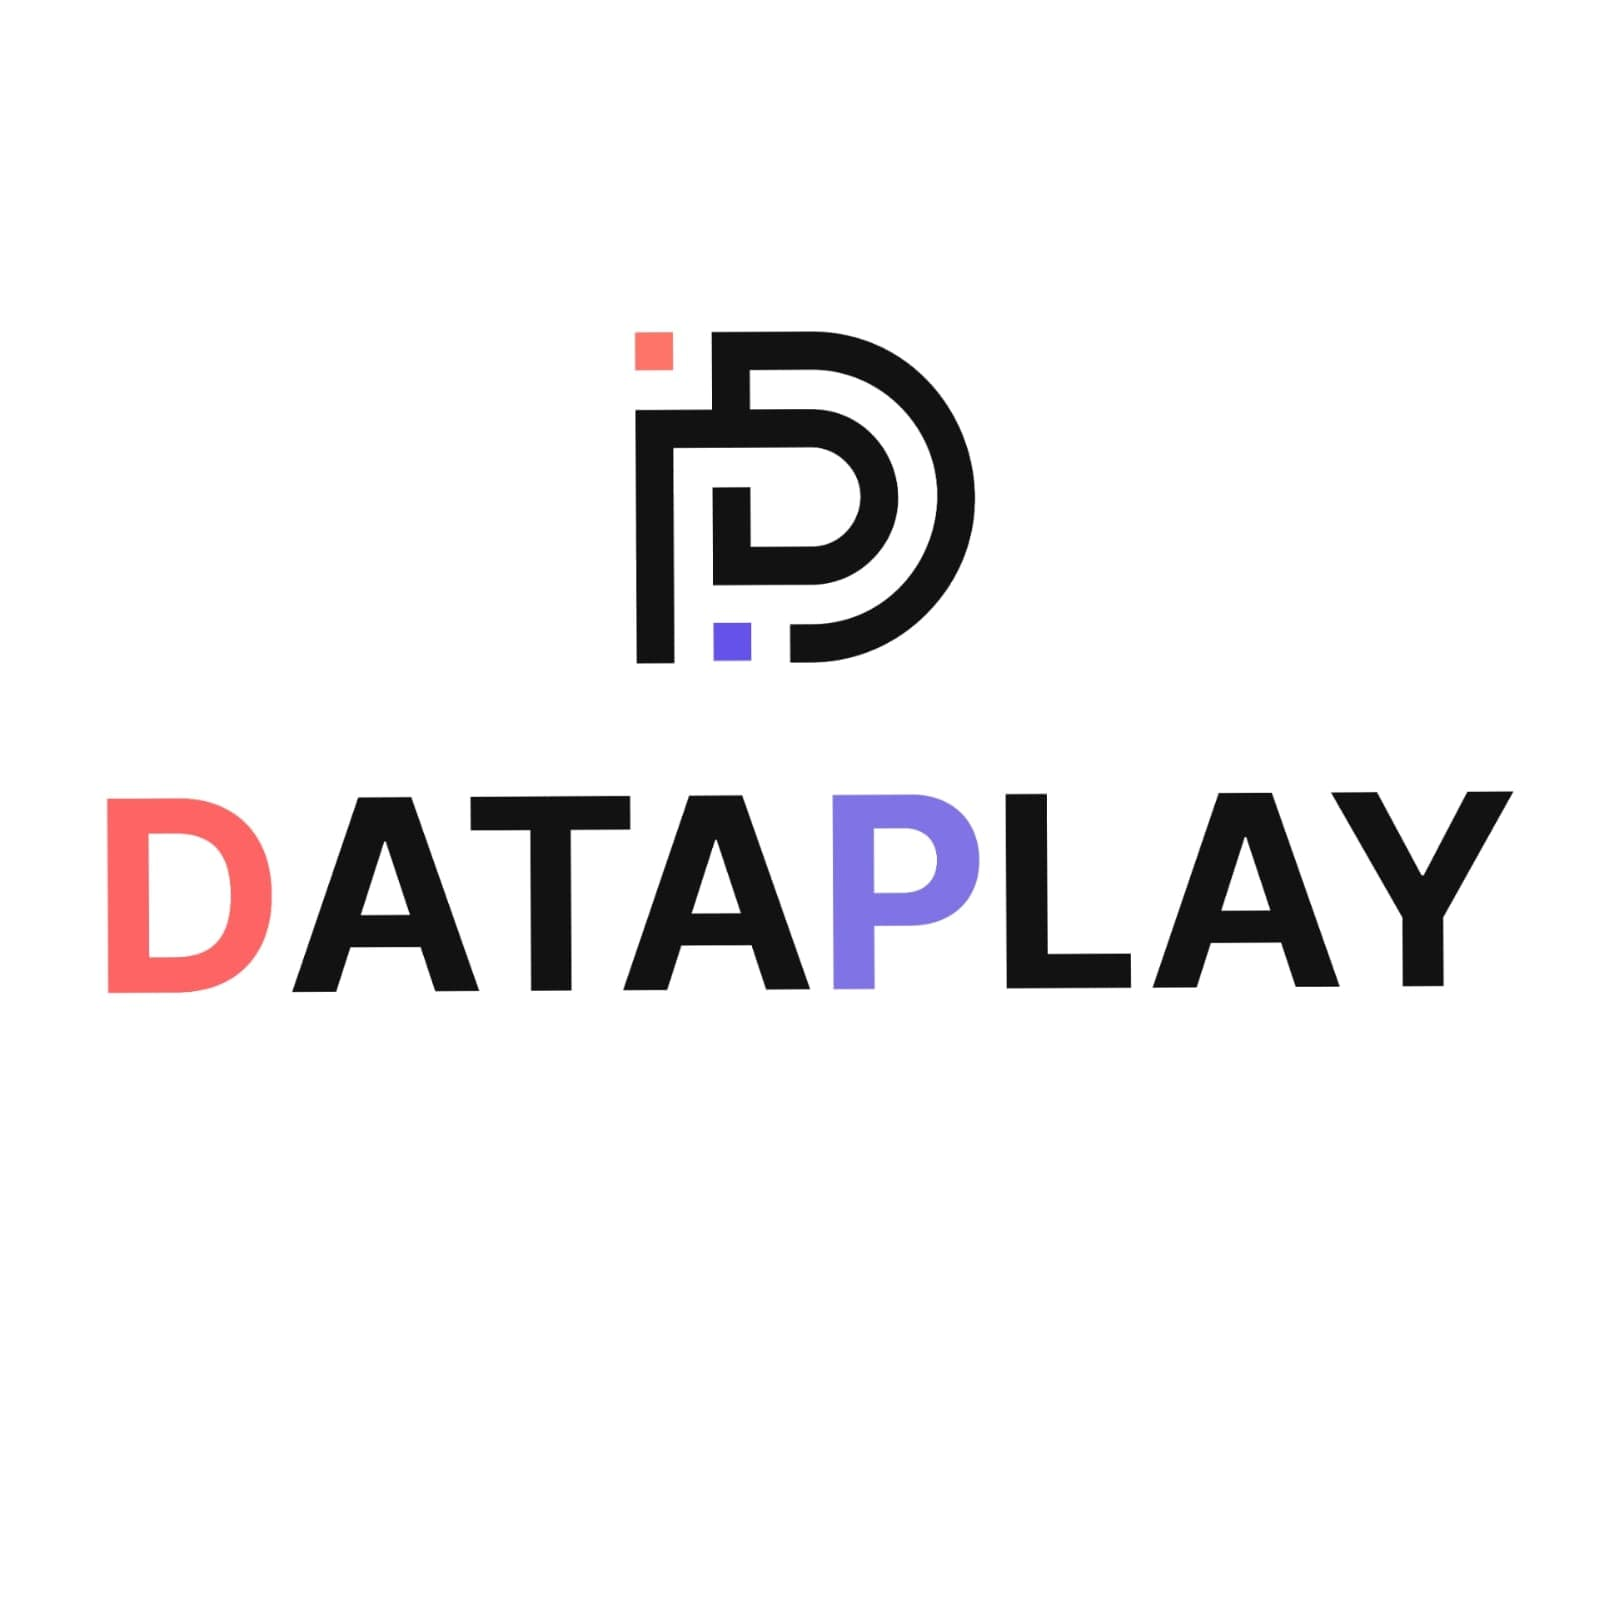

---

*End of Notebook*